# STAT 207 Group Lab Assignment 5 - [10 total points]

## Sampling Distributions

<hr>

## <u>Lab Grading</u>:

Should we grade your submission?  If not, write the netID of the submission to be graded.  (Note: We will only grade one assignment per group, and we'll pick the first one that says we should grade that submission.  We will assign the same grade to all team members.)

*For example*, you might respond: **grade this submission** or **my submission is under netID jdeeke**

Grade this submission

If you said **my submission is under netID** above, we will not read any more of your lab submission.

If you said **grade this submission** above, who worked with you on this submission?  Write both their **names** and **netIDs**.  Also, report the proportion of members of your group that haved played Pokemon.

<hr>

## <u>Purpose</u>:
You should work in groups of 2-3 on this report (not working in groups without permission will result in a point deduction). The purpose of this group lab assignment is to simulate sampling distributions and observe their properties.  
<hr>

## <u>Assignment Instructions</u>:

### Group Roles

Suggested and specified roles are provided below: 

#### Groups of 2

* **Driver**: This student will type the report.  While typing the report, you may be the one who is selecting the functions to apply to the data.
* **Navigator**: This student will guide the process of answering the question.  Specific ways to help may include: outlining the general steps needed to solve a question (providing the overview), locating examples within the course notes, and reviewing each line of code as it is typed.

#### Groups of 3

* **Driver**: This student will type the report.  They may also be the one to select the functions to apply to the data.
* **Navigator**: This student will guide the process of answering the question.  They may select the general approach to answering the question and/or a few steps to be completed along the way. 
* **Communicator**: This student will review the report (as it is typed) to ensure that it is clear and concise.  This student may also locate relevant examples within the course notes that may help complete the assignment.

<hr>

### Imports

In [16]:
#Run this
import pandas as pd                    # imports pandas and calls the imported version 'pd'
import matplotlib.pyplot as plt        # imports the package and calls it 'plt'
import seaborn as sns 
import numpy as np                 # imports the seaborn package with the imported name 'sns'
sns.set()  

## Case Study: Pokemon

The following dataset contains information about all current Pokemon, including those recently released in Generation 9 (2023).  Many common competitive formats will have trainers bring 6 Pokemon to a battle. Thus, we'd like to better understand characteristics of possible groups of 6.

The variables in the data include:

- **Height**: height (m)
- **Weight**: weight (kg)
- **Type1**: the primary type of the Pokemon
- **Ability1**: an ability of the Pokemon that it can hold naturally (may be the only one)
- **Ability2**: a second ability for the Pokemon that it can hold naturally, if that Pokemon has one
- **Ability_Hidden**: the hidden ability of the Pokemon, which can usually only be obtained through an unorthodox method
- **Get_Rate**: the rate at which the Pokemon can be captured (higher = easier to capture)
- **HP**: the base stat for hit points, which determines how much damage a Pokemon can sustain before fainting
- **Attack**: the base stat for how much damage a Pokemon can inflict with a physical move
- **Defense**: the base stat for how much damage a Pokemon can reduce when hit with a physical move
- **SP_Attack**: the base stat for how much damage a Pokemon can inflict with a special move
- **SP_Defense**: the base stat for how much damage a Pokemon can reduce when hit with a special move
- **Speed**: the base stat for speed, which determines the order in which Pokemon can move
- **Total**: the sum of each of the base statistics (HP, Attack, Defense, SP_Attack, SP_Defense, and Speed).

There are other variables in the data, which you are allowed to use if you understand their provided values.  More information about this dataset can be found at https://www.kaggle.com/datasets/takamasakato/pokemon-all-status-data.

Run the code in the cell below to read in the data for this document.  The data is saved as `df` with this code.  

In [3]:
df = pd.read_csv('Pokedex_Ver9.csv')
df

,No,Branch_Code,Original_Name,Name,Generation,Height,Weight,Type1,Type2,Ability1,...,SP_Attack,SP_Defense,Speed,Total,E_HP,E_Attack,E_Defense,E_SP_Attack,E_SP_Defense,E_Speed
0,1,1_0,Bulbasaur,Bulbasaur,1,0.7,6.9,Grass,Poison,Overgrow,...,65,65,45,318,0,0,0,1,0,0
1,2,2_0,Ivysaur,Ivysaur,1,1.0,13.0,Grass,Poison,Overgrow,...,80,80,60,405,0,0,0,1,1,0
2,3,3_0,Venusaur,Venusaur,1,2.0,100.0,Grass,Poison,Overgrow,...,100,100,80,525,0,0,0,2,1,0
3,3,3_1,Venusaur,Mega Venusaur,1,2.4,155.5,Grass,Poison,Thick Fat,...,122,120,80,625,0,0,0,2,1,0
4,4,4_0,Charmander,Charmander,1,0.6,8.5,Fire,NaN,Blaze,...,60,50,65,309,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1198,1006,1006_0,Iron Valiant,Iron Valiant,9,1.4,35.0,Fairy,Fighting,Quark Drive,...,120,60,116,590,0,3,0,0,0,0
1199,1007,1007_0,Koraidon,Koraidon,9,2.5,303.0,Fighting,Dragon,Orichalcum Pulse,...,85,100,135,670,0,3,0,0,0,0
1200,1008,1008_0,Miraidon,Miraidon,9,3.5,240.0,Electric,Dragon,Hadron Engine,...,135,115,135,670,0,0,0,3,0,0
1201,1009,1009_0,Walking Wake,Walking Wake,9,3.5,280.0,Water,Dragon,Protosynthesis,...,125,83,109,590,0,0,0,3,0,0


### 1. [5.5 points] Understanding a Typical Set of Pokemon for Battle

In this first question, we will generate a sampling distribution for 6 Pokemon that could currently be used in a single battle.

**a)** To start, does the full data represent a population or a sample?

This is a sample since it doesn't have every pokemon in this data set since there are 1300+ special forms.

**b)** Select one variable from this data and generate a visualization to examine the distribution of this variable. 

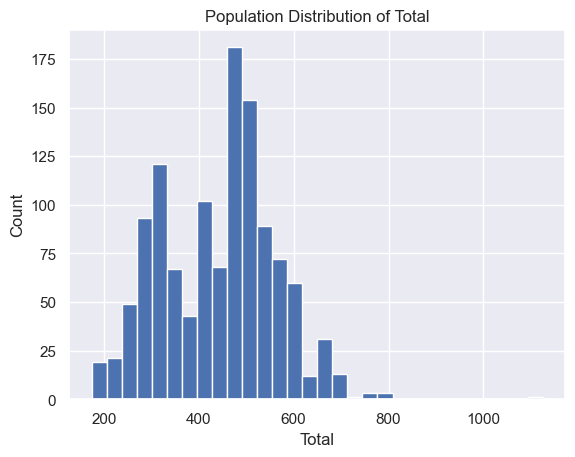

In [6]:
plt.figure()
plt.hist(df["Total"].dropna(), bins=30)
plt.xlabel("Total")
plt.ylabel("Count")
plt.title("Population Distribution of Total")
plt.show()

**c)** Generate one random sample of size 6 from the population.  Visualize this distribution.  Does it look similar to the distribution from part **b**?

In [9]:
sample6 = df["Total"].sample(n=6, replace=False, random_state=207)
sample6

700     390
616     528
1024    480
728     440
608     308
655     310
Name: Total, dtype: int64

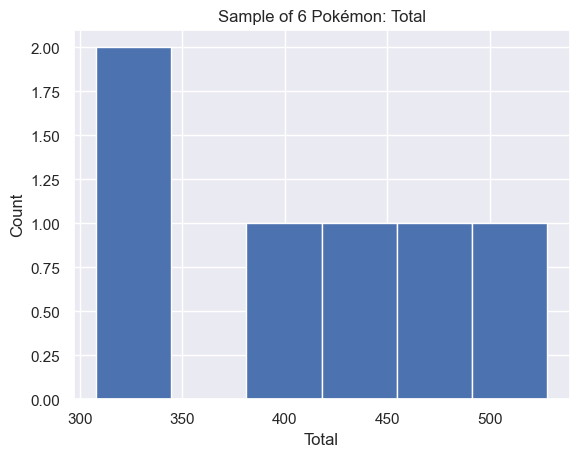

In [14]:
plt.figure()
plt.hist(sample6, bins=6)
plt.xlabel("Total")
plt.ylabel("Count")
plt.title("Sample of 6 Pokémon: Total")
plt.show()

**d)** Now, pick one summary measure other than a mean to summarize your variable of interest.  Calculate this value for both the whole distribution from part **b** and the sample you got in part **c**.

In [11]:
pop_median = df["Total"].median()
samp_median = sample6.median()

pop_median, samp_median

(np.float64(464.0), np.float64(415.0))

**e)** Now, generate repeated random samples of size 6 from the data and calculate your statistic of interest for each sample.  Record that statistic of interest for each sample, in the process creating a sampling distribution for your statistic of interest.

*Hint:* How many repetitions should you use?  This question is vague and allows you to select a number.  Be sure that you use *enough* so that your distribution doesn't look substantially different if you change/increase the number of repetitions.  

In [17]:

reps = 144
medians_n6 = []

for _ in range(reps):
    samp = df["Total"].sample(n=6, replace=False)
    medians_n6.append(samp.median())

medians_n6 = np.array(medians_n6)

**f)** Generate a histogram and describe the distribution for your sampling distribution from **1e**.

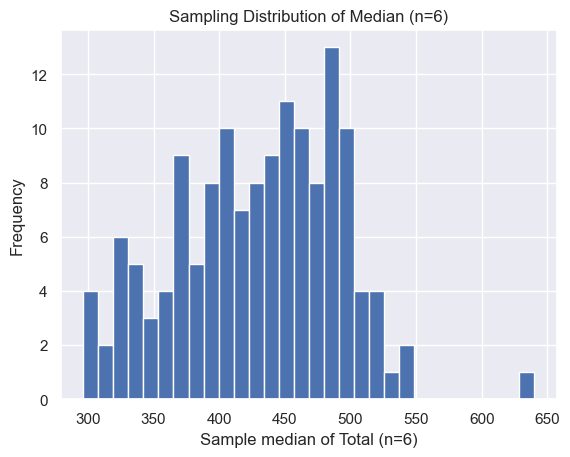

In [19]:
plt.figure()
plt.hist(medians_n6, bins=30)
plt.xlabel("Sample median of Total (n=6)")
plt.ylabel("Frequency")
plt.title("Sampling Distribution of Median (n=6)")
plt.show()

**g)** Calculate summary statistics for your sampling distribution, including at least the mean and standard deviation.

In [18]:
medians_n6.mean(), medians_n6.std()

(np.float64(428.7951388888889), np.float64(62.26370367890143))

### 2. [4.5 points] Considering a Rule Change

Suppose that you are a data scientist working with Pokemon.  The team is considering updating the game rules so that a different number of Pokemon are allowed to be used in battle.  They would like to explore how the statistic identified in **1d** will vary with these different sample sizes (number of Pokemon allowed in a battle).

You have been tasked with exploring how the possible change in rules will affect your statistic identified in **1d** and then summarizing and presenting your results to the team that will ultimately decide if or how to change the rules.

**a)** First, identify at least 3 different sample sizes to explore.  Be sure that your sample sizes are different enough that the largest sample size minus the smallest sample size is at least 30.  Report these 3 sample sizes below.

These different sample sizes represent different numbers of Pokemon that can be used in a battle.

6, 25, 50

**b)** Repeat the process from **1e** (generating the sampling distribution) for the 3 sample sizes for Pokemon to be allowed in battle that you selected in **2a**.

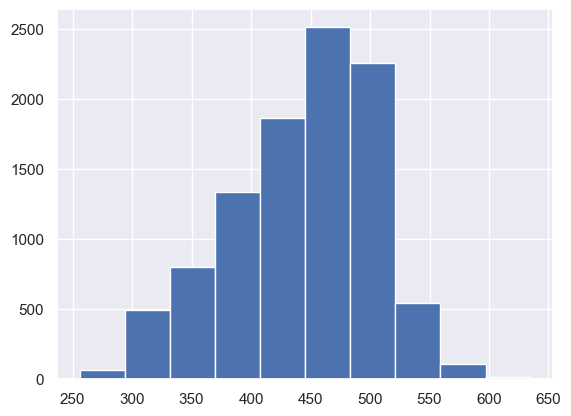

In [22]:
medians_6 = []

for i in range(10000):
    sample = df["Total"].sample(6)
    medians_6.append(sample.median())

plt.hist(medians_6)
plt.show()

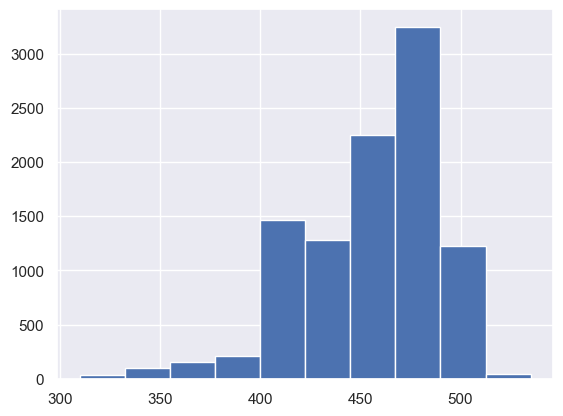

In [25]:
medians_25 = []

for i in range(10000):
    sample = df["Total"].sample(25)
    medians_25.append(sample.median())

plt.hist(medians_25)
plt.show()

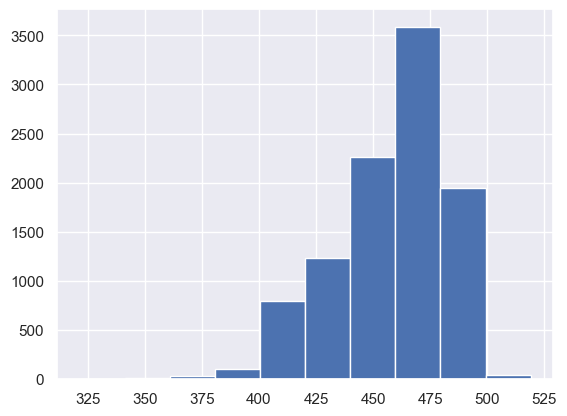

In [26]:
medians_50 = []

for i in range(10000):
    sample = df["Total"].sample(50)
    medians_50.append(sample.median())

plt.hist(medians_50)
plt.show()

**c)** Calculate summary statistics for each of your additional sampling distributions, including at least the mean and standard deviation.  Display these summary statistics for each of your additional sampling distributions.

In [27]:
np.mean(medians_6), np.std(medians_6)
np.mean(medians_25), np.std(medians_25)
np.mean(medians_50), np.std(medians_50)

(np.float64(458.02505), np.float64(24.019157926486514))

**d)** Describe how your sampling distributions from **2b** and **1e** change as the number of Pokemon allowed in battle increases.

As more pokemon battles are allowed the sampling distribution is more focused on the population value. The center of distribution still stays around the same but what is interesting is that the spread decreases as the sample increases. So from observing this you can conclude that with a larger battle size the stats become more stable.

### Bonus Question. [No points]

Try to find another group in your lab that used a different statistic than you did in **1d**.  What statistic did they use?  What did they observe when they looked at how their sampling distributions changed with increasing sample sizes?  Is this similar to what you observed?

A benefit of this approach: even though we don't have any theory (that we've learned in our class) to support what happens with a sampling distribution as the sample size increases, we can make some observations based on our simulations.  Isn't that exciting?!

Was sick and not in the lab

### 3. AI Acknowledgement

Our course policy is that you should write all of your own interpretations and other narrative answers (phrases or sentences) yourself without the assistance of AI.  AI should not be used on Questions 1a, 2d, and the Bonus Question of this assignment.  

You may use AI to help guide your code, although you should write all of your own code yourself (not copy-paste from another source) and you should cite your use of AI.  I would encourage you to try to generate any necessary code yourself first using course resources and using AI as a debugging tool if/when you reach an error that you can't figure out or to help you perform any coding tasks that are more advanced than we've demonstrated during class (intended only for projects).  

Did you use AI on this assignment?  Did you use other resources outside of our course-provided resources on this assignment?

Yes

If you used AI or other resources, answer the following questions to cite your usage.

- Which AI and/or resources did you use?
- What prompts did you ask it?
- How did you integrate the responses into your assignment?  Specifically, which questions or parts are associated with this usage?

Note: answering these three questions are enough for our course but may not be enough for a different course or context.

I used ChatGPT
The prompt I used was how could I improve the code to my graphs and I intergrated it with the graphing portion only in part 1.